In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setup
## Importing Dataset

In [4]:
crop_df = pd.read_csv('../Datasets/Cropdata.csv')
crop_df

,N,P,K,temperature,humidity,ph,rainfall,label,Family
0,90.000000,42.000000,43.000000,20.879744,82.002744,6.502985,202.935536,rice,Cereals
1,85.000000,58.000000,41.000000,21.770462,80.319644,7.038096,226.655537,rice,Cereals
2,60.000000,55.000000,44.000000,23.004459,82.320763,7.840207,263.964248,rice,Cereals
3,74.000000,35.000000,40.000000,26.491096,80.158363,6.980401,242.864034,rice,Cereals
4,78.000000,42.000000,42.000000,20.130175,81.604873,7.628473,262.717340,rice,Cereals
...,...,...,...,...,...,...,...,...,...
8595,61.805859,47.672594,97.414930,24.850300,123.487088,6.036764,196.676977,Silk (from silkworms),Commercial crops
8596,22.844938,80.668085,107.294228,24.955801,79.604883,4.774558,217.397726,Silk (from silkworms),Commercial crops
8597,43.175013,51.194571,27.759517,21.188037,47.946527,4.760295,52.777676,Silk (from silkworms),Commercial crops
8598,31.754884,-18.441935,104.397553,33.770748,45.797009,6.992872,112.977350,Silk (from silkworms),Commercial crops


In [5]:
exotic_crops_df = pd.read_csv('../Datasets/imported_crops.csv')
exotic_crops_df

,Name,K_mean,N_mean,P_mean,temperature_mean,humidity_mean,ph_mean,rainfall_mean
0,Broccoli,-0.395067,0.072551,-0.299363,-0.730196,-2.464421,-0.741455,0.391420
1,Kiwi,2.862921,1.770581,2.169387,-0.478527,-1.615034,-1.031437,-0.317673
2,Strawberry,2.785872,-0.024274,2.111003,0.211918,0.715227,0.089651,-1.090468
3,Raspberry,0.101274,1.882509,0.076741,-0.042715,-0.144162,1.672384,1.003334
4,Blackberry,1.407498,0.950132,1.066535,-0.302464,-1.020819,1.163085,-0.754451
5,Blueberry,2.357679,0.877938,1.786538,-0.130474,-0.440350,-0.535160,0.787041
6,Avocado,1.262562,1.606164,0.956710,0.060027,0.202592,-0.639949,0.842109
7,Lettuce,0.301153,-0.477937,0.228199,-0.307976,-1.039423,0.226464,2.252677
8,Celery,-0.530951,1.364232,-0.402330,-0.633418,-2.137792,0.733279,2.124691
9,"Bell peppers (Red, Yellow, Orange)",0.453253,0.235062,0.343454,0.097674,0.329650,-0.268902,-0.443299


In [6]:
local_crops_df = pd.read_csv('../Datasets/populate_data.csv')
local_crops_df

,Name,K_mean,N_mean,P_mean,temperature_mean,humidity_mean,ph_mean,rainfall_mean
0,Rice,2.589890,-0.680122,-0.739135,0.313570,1.058304,0.703327,1.395175
1,Wheat,1.225176,0.390698,-0.728476,0.004340,0.014647,1.799890,0.326655
2,Cotton,0.747869,0.391575,-0.717816,-0.368993,-1.245356,-0.164976,1.836870
3,Jute,0.037714,0.308731,-0.707157,0.019014,0.064172,-1.308706,1.988913
4,Sugarcane,0.568869,1.284250,-0.696498,-0.540578,-1.824458,0.605424,-0.663376
...,...,...,...,...,...,...,...,...
95,Safflowerseed,2.298448,0.848534,0.273503,-0.247213,-0.834347,-0.158261,1.065747
96,Deccan Hemp,-0.153785,-0.411203,0.284163,-0.166120,-0.560658,0.798191,-0.018888
97,Sunn Hemp,-0.729022,1.834669,0.294822,-0.486102,-1.640599,-0.936832,0.988271
98,Subabul,2.232904,0.323228,0.305482,-0.255178,-0.861230,-0.375688,2.050787


In [7]:
print(crop_df[crop_df['label'] == 'banana'])

          N     P     K  temperature   humidity        ph    rainfall   label  \
1000   91.0  94.0  46.0    29.367924  76.249001  6.149934   92.828409  banana   
1001  105.0  95.0  50.0    27.333690  83.676752  5.849076  101.049479  banana   
1002  108.0  92.0  53.0    27.400536  82.962213  6.276800  104.937800  banana   
1003   86.0  76.0  54.0    29.315908  80.115857  5.926825   90.109781  banana   
1004   80.0  77.0  49.0    26.054330  79.396545  5.519088  113.229737  banana   
...     ...   ...   ...          ...        ...       ...         ...     ...   
1095  108.0  94.0  47.0    27.359116  84.546250  6.387431   90.812505  banana   
1096   92.0  81.0  52.0    28.010680  76.528081  5.891414  103.704078  banana   
1097  110.0  71.0  54.0    28.672089  82.207936  5.725419   94.379875  banana   
1098   82.0  75.0  55.0    27.345851  78.487383  6.281070   92.155243  banana   
1099  117.0  81.0  53.0    29.507046  78.205856  5.507642   98.125658  banana   

     Family  
1000    NaN  

In [8]:
d1_names = set(crop_df['label'])
d2_names = set(local_crops_df['Name'])
d3_names = set(exotic_crops_df['Name'])

# Convert names in d1_names, d2_names, and d3_names to lowercase
d1_names_lower = {name.lower() for name in d1_names}
d2_names_lower = {name.lower() for name in d2_names}
d3_names_lower = {name.lower() for name in d3_names}

# Find the set difference: names in d1 that are not in d2 or d3
names_in_d1_not_in_d2_or_d3 = d1_names_lower - d2_names_lower - d3_names_lower

# Print the names
print(names_in_d1_not_in_d2_or_d3)

{'potatoes', 'cashew nuts', 'watermelons', 'mungbean', 'gourds', 'betel nuts', 'mothbeans', 'walnuts', 'pigeon peas', 'mangoes', 'foxtail millet', 'berries', 'chili', 'pomegranates', 'cabbage', 'turnips', 'saffron', 'almonds', 'garlic', 'muskmelons', 'onions', 'pumpkins', 'maize (corn)', 'tomatoes', 'blackgram', 'pigeonpeas', 'finger millet', 'bananas', 'pearl millet', 'soybean', 'silk (from silkworms)', 'radish', 'strawberries', 'chickpea', 'pineapples', 'papayas', 'opium poppy (for pharmaceuticals)', 'lentils', 'cucumbers', 'kidneybeans', 'carrots', 'pistachios', 'sesame', 'cocoa (for chocolate)', 'tobacco', 'citrus fruits', 'eggplant (brinjal)', 'guavas', 'okra (ladyfinger)', 'chickpeas', 'mung beans', 'apples'}


# Implementing UCB

In [53]:
import pandas as pd
import numpy as np

# Define farmer preferences
farmer_preferences = {
    'K_mean': -2,
    'N_mean': -1,
    'P_mean': 0.3,
    'temperature_mean': -1.1,
    'humidity_mean': -0.2,
    'ph_mean': 1,
    'rainfall_mean': 2,
}

# Define the function to calculate rewards and find the optimal crop
def calculate_rewards_and_find_optimal_crop(data, farmer_preferences):
    # Initialize a list to store MSEs and rewards
    rewards = []

    # Iterate through each crop in the DataFrame
    for index, row in data.iterrows():
        # Calculate MSE between the crop and farmer preferences
        mse = np.mean([(row[key] - farmer_preferences[key]) ** 2 for key in farmer_preferences])
        
        # Calculate reward from MSE (higher reward for lower MSE)
        reward = 1 / (1 + mse)
        
        # Append reward to the list
        rewards.append(reward)
    
    # Add the rewards as a new column in the DataFrame
    data['normalized_reward'] = rewards
    
    # Sort the DataFrame based on rewards in descending order
    data_sorted = data.sort_values(by='normalized_reward', ascending=False)
    
    # Return the sorted DataFrame and the optimal crop
    optimal_crop = data_sorted.iloc[0]
    
    return data_sorted

# Example usage
# local_crops_df and exotic_crops_df should be defined as pandas DataFrames with the crop data
local_crops_df = calculate_rewards_and_find_optimal_crop(local_crops_df, farmer_preferences)
exotic_crops_df = calculate_rewards_and_find_optimal_crop(exotic_crops_df, farmer_preferences)

local_crops_df

,Name,K_mean,N_mean,P_mean,temperature_mean,humidity_mean,ph_mean,rainfall_mean,normalized_reward
56,Moth Bean,-0.520827,-0.740671,-0.142211,-0.245031,-0.826983,0.833300,1.569196,0.648856
30,Guava,-0.297814,-0.360700,-0.419355,-0.165894,-0.559896,0.638902,2.347243,0.579630
77,Fenugreek (Leaves),-0.660889,-0.408289,0.081635,-0.275660,-0.930356,-0.541103,2.413125,0.540555
85,Custard Apple,0.068449,-0.517103,0.166910,-0.065594,-0.221381,1.513700,1.512811,0.534307
29,Grapes,-0.231412,0.357936,-0.430014,-0.258157,-0.871284,0.909329,2.502423,0.502701
...,...,...,...,...,...,...,...,...,...
17,Orange,2.697332,1.560156,-0.557926,-0.406481,-1.371877,-1.329484,2.318929,0.160045
51,Masoor,2.304603,0.512438,-0.195508,-0.043893,-0.148140,-1.311996,-1.088633,0.158854
86,Bael,2.474769,0.165054,0.177569,-0.704323,-2.377099,-0.746761,-1.019847,0.153972
33,Papaya,2.856264,-0.077243,-0.387376,-0.227130,-0.766567,-0.741397,-1.090621,0.153594


In [83]:
local_crops_df_updated = local_crops_df
exotic_crops_df_updated = exotic_crops_df

In [84]:
def ucb_algorithm(data, budget, alpha):
    total_crops = len(data)  # Number of crops in the dataset
    num_selections = np.zeros(total_crops)  # Number of times each crop is selected
    sums_of_rewards = np.zeros(total_crops)  # Sum of rewards for each crop
    ucb_values = np.zeros(total_crops)  # UCB values for each crop

    # Metrics to track over time
    arm_selections_over_time = [[] for _ in range(total_crops)]
    cumulative_rewards_over_time = []
    ucb_values_over_time = [[] for _ in range(total_crops)]
    
    # Cumulative reward
    cumulative_reward = 0

    # UCB algorithm
    for round_num in range(1, budget + 1):
        # Calculate UCB values
        for crop_index in range(total_crops):
            if num_selections[crop_index] == 0:
                ucb_values[crop_index] = np.inf  # Initial exploration (infinity)
            else:
                avg_reward = sums_of_rewards[crop_index] / num_selections[crop_index]
                delta_i = alpha * np.sqrt((np.log(round_num)) / num_selections[crop_index])
                ucb_values[crop_index] = avg_reward + delta_i
            
            # Track UCB values over time
            ucb_values_over_time[crop_index].append(ucb_values[crop_index])

        # Select the crop with the highest UCB value
        crop_selected = np.argmax(ucb_values)
        # Get the normalized reward for the selected crop
        normalized_reward = data.loc[crop_selected, 'normalized_reward']

        # Update the selections and rewards
        num_selections[crop_selected] += 1
        sums_of_rewards[crop_selected] += normalized_reward
        
        # Track arm selections over time
        for i in range(total_crops):
            arm_selections_over_time[i].append(num_selections[i])

        # Update cumulative reward and track it over time
        cumulative_reward += normalized_reward
        cumulative_rewards_over_time.append(cumulative_reward)

    # Prepare the output: crop indices and associated UCB values
    top_crops_indices = np.argsort(-ucb_values)
    result = [(index, ucb_values[index]) for index in top_crops_indices]
    
    return arm_selections_over_time, cumulative_rewards_over_time, ucb_values_over_time, result


In [85]:
# Run the UCB algorithm for local and imported crops
arm_selections_over_time_local, cumulative_rewards_over_time_local, ucb_values_over_time_local, local_results = ucb_algorithm(local_crops_df_updated, 10000, 20)
arm_selections_over_time_imported, cumulative_rewards_over_time_imported, ucb_values_over_time_imported, imported_results = ucb_algorithm(exotic_crops_df_updated, 10000, 20)

In [86]:
def plot_arm_selections(arm_selections, num_crops):
    plt.figure(figsize=(12, 6))
    for crop_index in range(num_crops):
        plt.plot(arm_selections[crop_index])
    plt.xlabel('Round')
    plt.ylabel('Number of Selections')
    plt.title('Arm Selections Over Time')
    plt.show()

def plot_cumulative_rewards(cumulative_rewards):
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_rewards)
    plt.xlabel('Round')
    plt.ylabel('Cumulative Reward')
    plt.title('Cumulative Rewards Over Time')
    plt.show()

def plot_ucb_values(ucb_values, num_crops):
    plt.figure(figsize=(12, 6))
    for crop_index in range(num_crops):
        plt.plot(ucb_values[crop_index])
    plt.xlabel('Round')
    plt.ylabel('UCB Value')
    plt.title('UCB Values Over Time')
    plt.show()


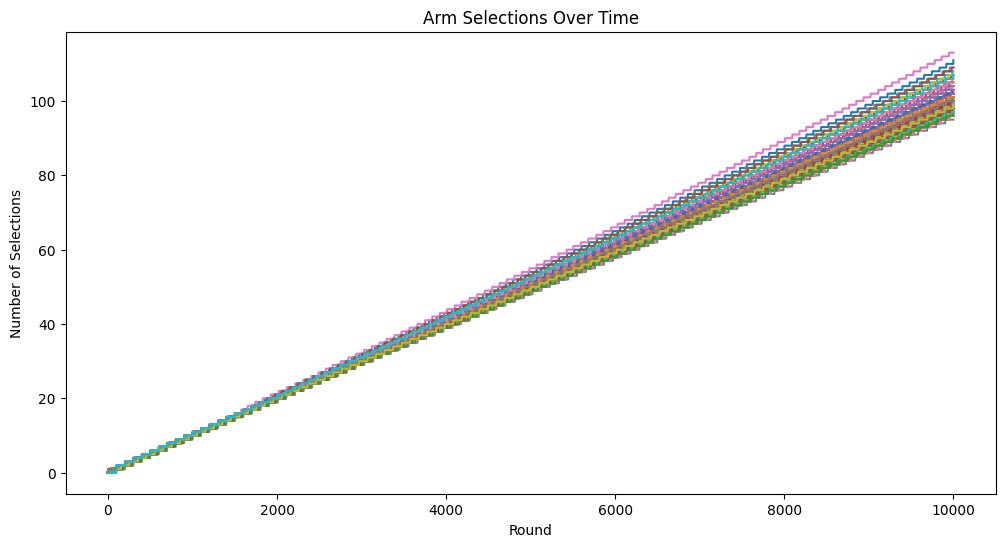

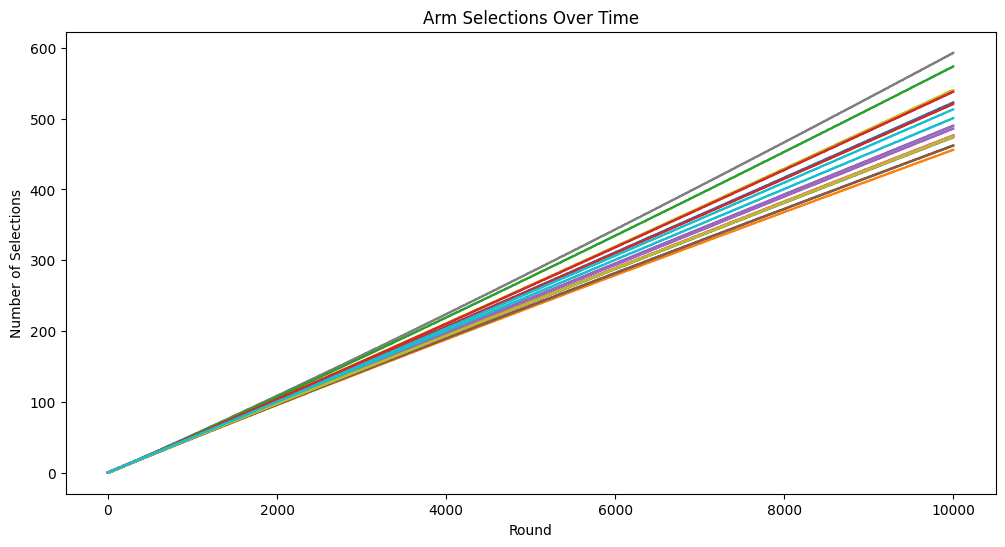

In [87]:
plot_arm_selections(arm_selections_over_time_local, len(local_crops_df_updated))
plot_arm_selections(arm_selections_over_time_imported, len(exotic_crops_df_updated))

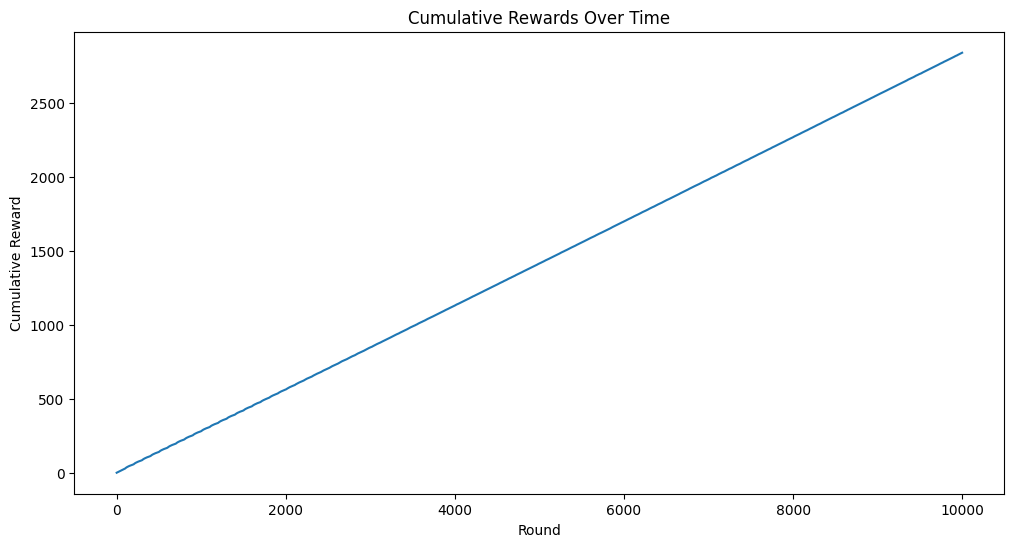

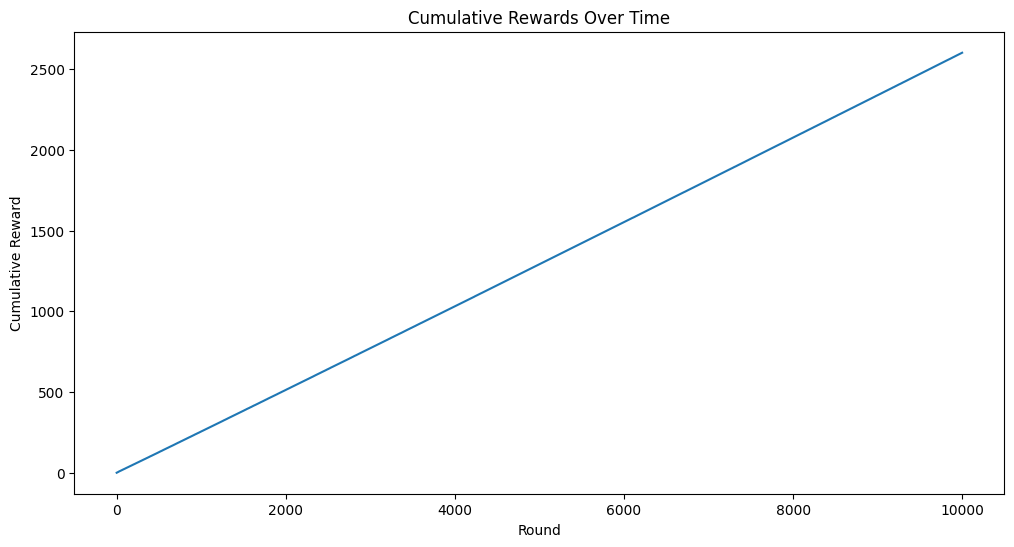

In [88]:
plot_cumulative_rewards(cumulative_rewards_over_time_local)
plot_cumulative_rewards(cumulative_rewards_over_time_imported)

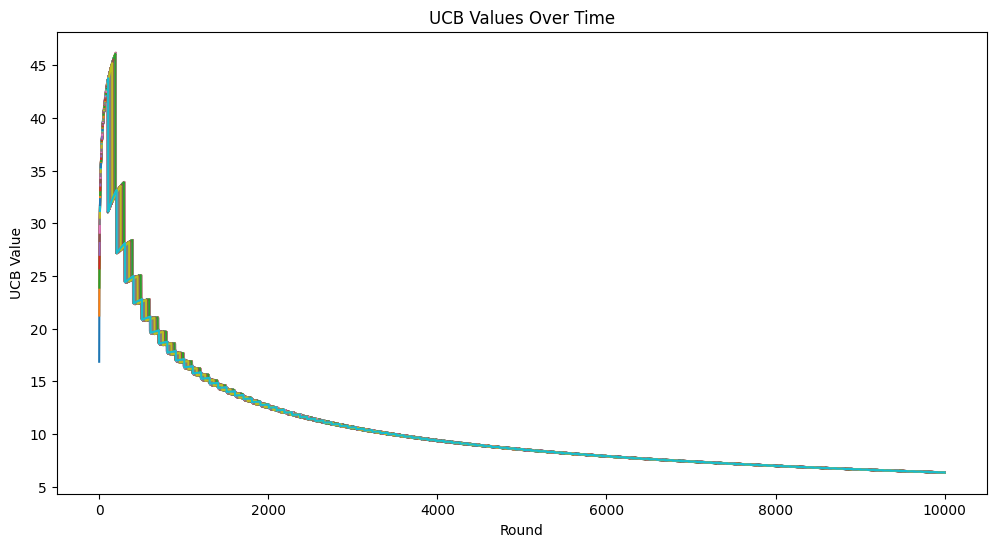

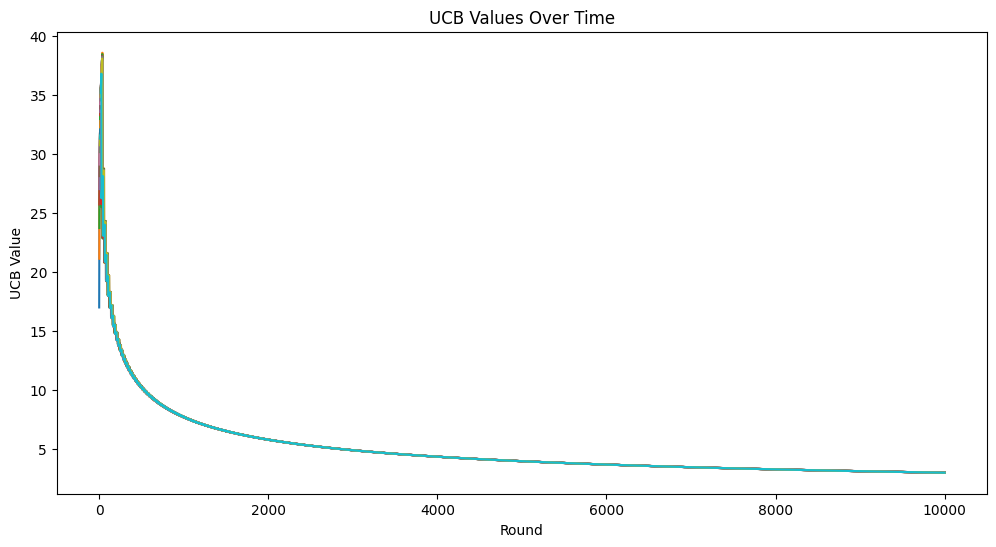

In [89]:
plot_ucb_values(ucb_values_over_time_local, len(local_crops_df_updated))
plot_ucb_values(ucb_values_over_time_imported, len(exotic_crops_df_updated))

In [90]:
# Display the top 4 local crops and 1 imported crop with their UCB values
local_top_indices, local_ucb_values = zip(*local_results)
imported_top_indices, imported_ucb_values = zip(*imported_results)

top_4_local_crops_indices = local_top_indices[:4]
top_1_imported_crop_index = imported_top_indices[0]

print("\nTop 4 local crops based on UCB algorithm and farmer's preferences:")
for i in range(4):
    index = top_4_local_crops_indices[i]
    name = local_crops_df_updated.iloc[index]['Name']
    weighted_reward = local_crops_df_updated.iloc[index]['normalized_reward']
    ucb_value = local_ucb_values[i]
    print(f"Crop {i + 1}: {name}, UCB Value: {ucb_value}")

print("\nTop 1 imported crop based on UCB algorithm and farmer's preferences:")
imported_index = top_1_imported_crop_index
imported_name = exotic_crops_df_updated.iloc[imported_index]['Name']
imported_weighted_reward = exotic_crops_df_updated.iloc[imported_index]['normalized_reward']
imported_ucb_value = imported_ucb_values[0]
print(f"Name: {imported_name}, UCB Value: {imported_ucb_value}")


Top 4 local crops based on UCB algorithm and farmer's preferences:
Crop 1: Guava, UCB Value: 6.366870405292568
Crop 2: Pumpkin, UCB Value: 6.366790416723886
Crop 3: Tur, UCB Value: 6.366145957622773
Crop 4: Spinach, UCB Value: 6.3657811080564874

Top 1 imported crop based on UCB algorithm and farmer's preferences:
Name: Nectarines, UCB Value: 2.9747569104133


# UCB with budget as money

In [91]:
local_crops_df['budget'] = np.random.randint(100, 1000, size=len(local_crops_df))
exotic_crops_df['budget'] = np.random.randint(100, 1000, size=len(exotic_crops_df))
local_crops_df

,Name,K_mean,N_mean,P_mean,temperature_mean,humidity_mean,ph_mean,rainfall_mean,normalized_reward,budget
0,Rice,2.589890,-0.680122,-0.739135,0.313570,1.058304,0.703327,1.395175,0.210308,647
1,Wheat,1.225176,0.390698,-0.728476,0.004340,0.014647,1.799890,0.326655,0.278894,806
2,Cotton,0.747869,0.391575,-0.717816,-0.368993,-1.245356,-0.164976,1.836870,0.340896,832
3,Jute,0.037714,0.308731,-0.707157,0.019014,0.064172,-1.308706,1.988913,0.340937,358
4,Sugarcane,0.568869,1.284250,-0.696498,-0.540578,-1.824458,0.605424,-0.663376,0.233248,400
...,...,...,...,...,...,...,...,...,...,...
95,Safflowerseed,2.298448,0.848534,0.273503,-0.247213,-0.834347,-0.158261,1.065747,0.217132,133
96,Deccan Hemp,-0.153785,-0.411203,0.284163,-0.166120,-0.560658,0.798191,-0.018888,0.440965,418
97,Sunn Hemp,-0.729022,1.834669,0.294822,-0.486102,-1.640599,-0.936832,0.988271,0.293159,320
98,Subabul,2.232904,0.323228,0.305482,-0.255178,-0.861230,-0.375688,2.050787,0.235575,768


In [92]:
local_crops_df_updated_forbudget = local_crops_df
exotic_crops_df_updated_forbudget = exotic_crops_df
local_crops_df_updated_forbudget

,Name,K_mean,N_mean,P_mean,temperature_mean,humidity_mean,ph_mean,rainfall_mean,normalized_reward,budget
0,Rice,2.589890,-0.680122,-0.739135,0.313570,1.058304,0.703327,1.395175,0.210308,647
1,Wheat,1.225176,0.390698,-0.728476,0.004340,0.014647,1.799890,0.326655,0.278894,806
2,Cotton,0.747869,0.391575,-0.717816,-0.368993,-1.245356,-0.164976,1.836870,0.340896,832
3,Jute,0.037714,0.308731,-0.707157,0.019014,0.064172,-1.308706,1.988913,0.340937,358
4,Sugarcane,0.568869,1.284250,-0.696498,-0.540578,-1.824458,0.605424,-0.663376,0.233248,400
...,...,...,...,...,...,...,...,...,...,...
95,Safflowerseed,2.298448,0.848534,0.273503,-0.247213,-0.834347,-0.158261,1.065747,0.217132,133
96,Deccan Hemp,-0.153785,-0.411203,0.284163,-0.166120,-0.560658,0.798191,-0.018888,0.440965,418
97,Sunn Hemp,-0.729022,1.834669,0.294822,-0.486102,-1.640599,-0.936832,0.988271,0.293159,320
98,Subabul,2.232904,0.323228,0.305482,-0.255178,-0.861230,-0.375688,2.050787,0.235575,768


In [93]:
def ucb_algorithm_budget(data, farmer_preferences, alpha):
    total_crops = len(data)  # Number of crops in the dataset
    farmer_budget = farmer_preferences.get('budget', 0)  # Farmer's budget from preferences
    
    num_selections = np.zeros(total_crops)  # Number of times each crop is selected
    sums_of_rewards = np.zeros(total_crops)  # Sum of rewards for each crop
    ucb_values = np.zeros(total_crops)  # UCB values for each crop

    # Metrics to track over time
    arm_selections_over_time = [[] for _ in range(total_crops)]
    cumulative_rewards_over_time = []
    ucb_values_over_time = [[] for _ in range(total_crops)]

    # UCB algorithm
    cumulative_reward = 0  # Track cumulative reward over time
    for round_num in range(1, farmer_budget + 1):  # Use farmer's budget as number of rounds
        # Calculate UCB values for each crop
        for crop_index in range(total_crops):
            crop_budget = data.loc[crop_index, 'budget']
            if crop_budget > farmer_budget:
                # Skip crops that exceed the farmer's budget
                ucb_values[crop_index] = -np.inf
            elif num_selections[crop_index] == 0:
                ucb_values[crop_index] = np.inf  # Initial exploration (infinity)
            else:
                avg_reward = sums_of_rewards[crop_index] / num_selections[crop_index]
                delta_i = alpha * np.sqrt((np.log(round_num)) / num_selections[crop_index])
                ucb_values[crop_index] = avg_reward + delta_i
            
            # Track UCB values over time
            ucb_values_over_time[crop_index].append(ucb_values[crop_index])

        # Select the crop with the highest UCB value within the farmer's budget
        crop_selected = np.argmax(ucb_values)
        # Get the normalized reward for the selected crop
        normalized_reward = data.loc[crop_selected, 'normalized_reward']

        # Update the selections and rewards
        num_selections[crop_selected] += 1
        sums_of_rewards[crop_selected] += normalized_reward
        
        # Track arm selections over time
        for i in range(total_crops):
            arm_selections_over_time[i].append(num_selections[i])

        # Update cumulative reward and track it over time
        cumulative_reward += normalized_reward
        cumulative_rewards_over_time.append(cumulative_reward)

    # Prepare the output: crop indices and associated UCB values
    top_crops_indices = np.argsort(-ucb_values)
    result = [(index, ucb_values[index]) for index in top_crops_indices]

    return arm_selections_over_time, cumulative_rewards_over_time, ucb_values_over_time, result


In [94]:
# Use the farmer's budget in the preferences dictionary
farmer_preferences = {
    'K_mean': -2,
    'N_mean': -1,
    'P_mean': 0.3,
    'temperature_mean': -1.1,
    'humidity_mean': -0.2,
    'ph_mean': 1,
    'rainfall_mean': 2,
    'budget': 1000  # Add farmer's budget
}

# Apply the UCB algorithm to local crops and exotic crops with farmer's budget
arm_selections_over_time_local, cumulative_rewards_over_time_local, ucb_values_over_time_local, local_results = ucb_algorithm_budget(local_crops_df_updated_forbudget, farmer_preferences,20)
arm_selections_over_time_imported, cumulative_rewards_over_time_imported, ucb_values_over_time_imported, imported_results = ucb_algorithm_budget(exotic_crops_df_updated_forbudget, farmer_preferences,20)

In [95]:
def plot_arm_selections(arm_selections, num_crops):
    plt.figure(figsize=(12, 6))
    for crop_index in range(num_crops):
        plt.plot(arm_selections[crop_index])
    plt.xlabel('Round')
    plt.ylabel('Number of Selections')
    plt.title('Arm Selections Over Time')
    plt.show()

def plot_cumulative_rewards(cumulative_rewards):
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_rewards)
    plt.xlabel('Round')
    plt.ylabel('Cumulative Reward')
    plt.title('Cumulative Rewards Over Time')
    plt.show()

def plot_ucb_values(ucb_values, num_crops):
    plt.figure(figsize=(12, 6))
    for crop_index in range(num_crops):
        plt.plot(ucb_values[crop_index])
    plt.xlabel('Round')
    plt.ylabel('UCB Value')
    plt.title('UCB Values Over Time')
    plt.show()


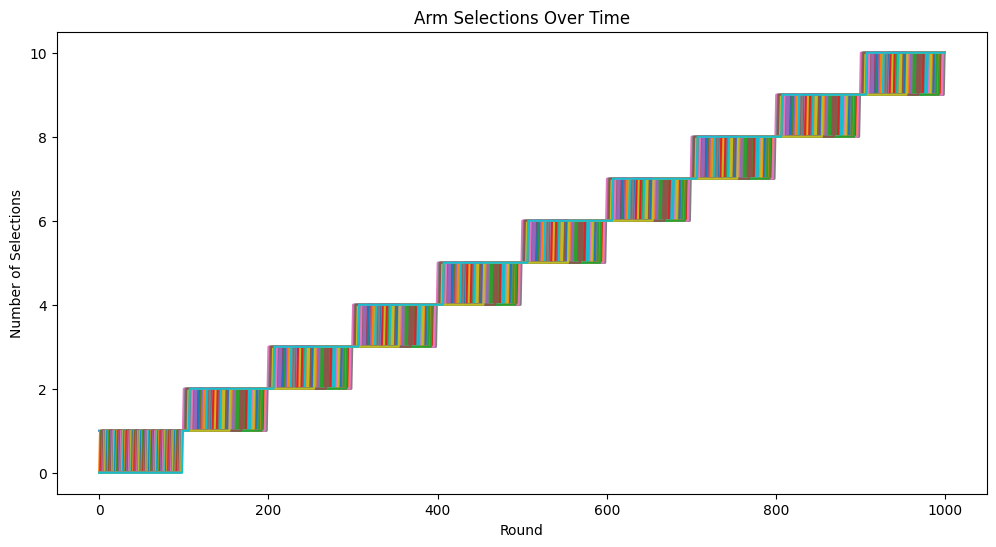

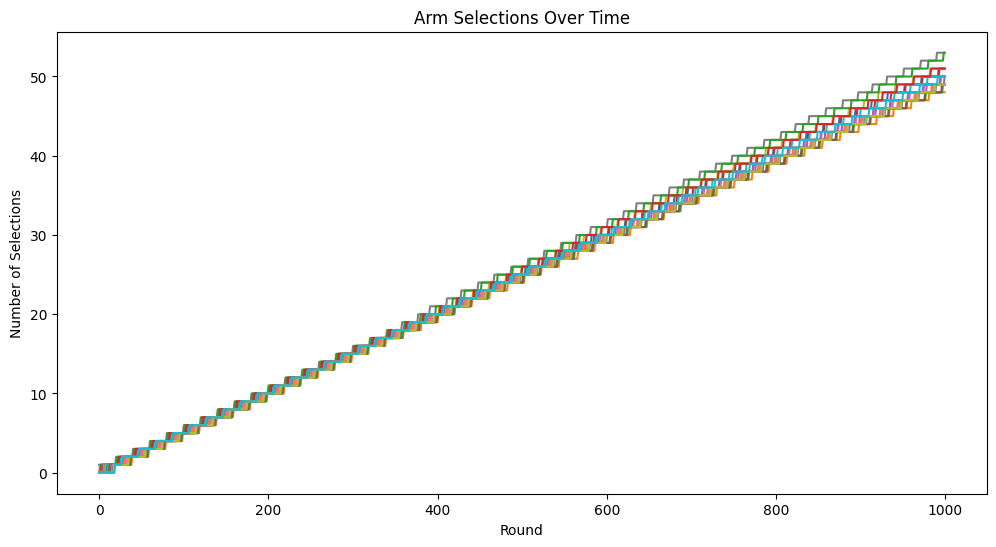

In [96]:
plot_arm_selections(arm_selections_over_time_local, len(local_crops_df_updated_forbudget))
plot_arm_selections(arm_selections_over_time_imported, len(exotic_crops_df_updated_forbudget))

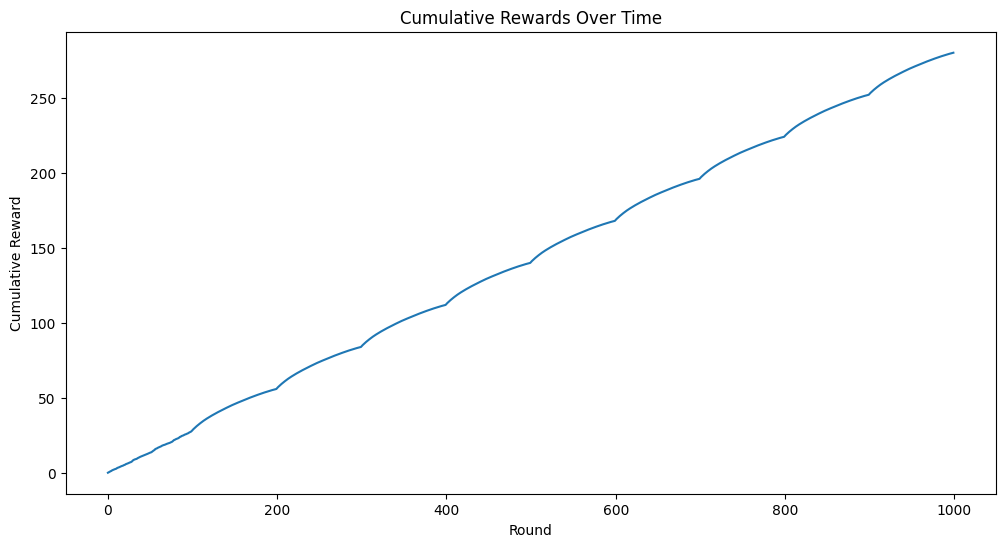

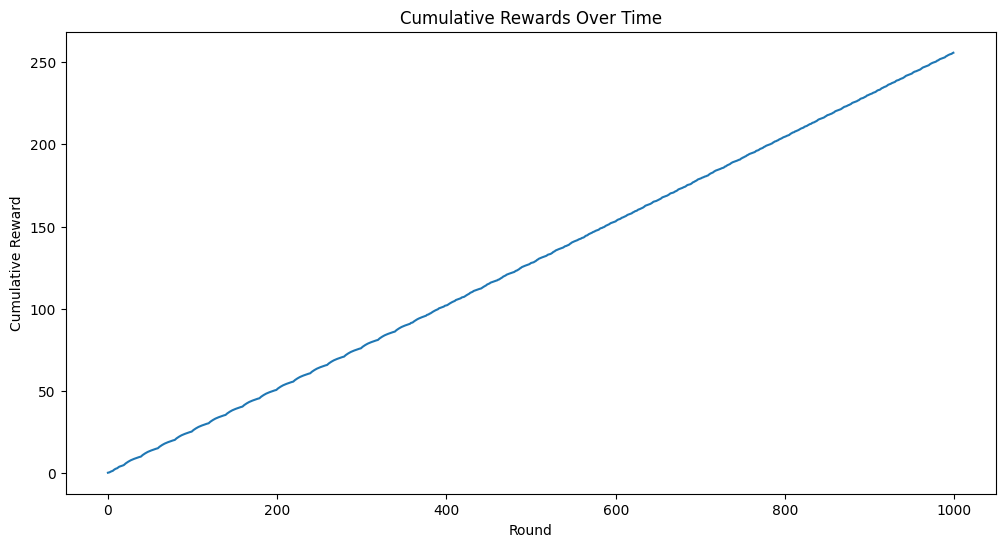

In [97]:
plot_cumulative_rewards(cumulative_rewards_over_time_local)
plot_cumulative_rewards(cumulative_rewards_over_time_imported)

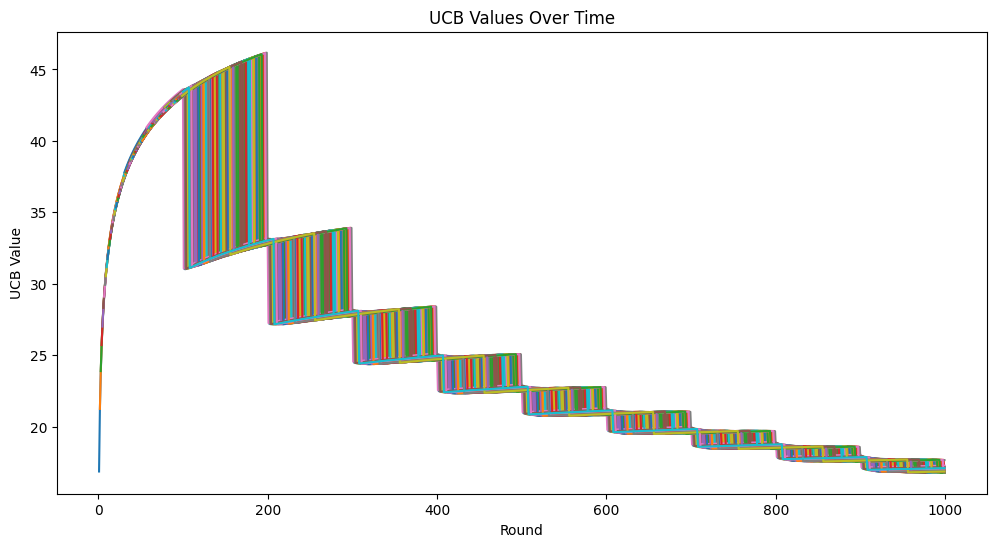

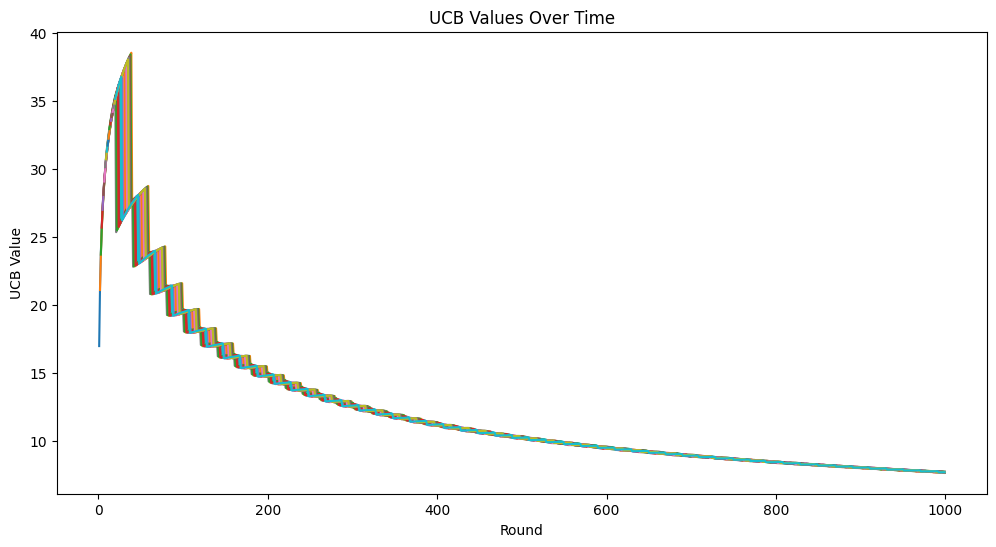

In [76]:
plot_ucb_values(ucb_values_over_time_local, len(local_crops_df_updated_forbudget))
plot_ucb_values(ucb_values_over_time_imported, len(exotic_crops_df_updated_forbudget))

In [98]:
# Get the top 4 local crops and top 1 imported crop
top_4_local_crops_indices = [index for index, _ in local_results[:4]]
top_1_imported_crop_index = imported_results[0][0]

# Display the results
print("\nTop 4 local crops based on UCB algorithm and farmer's preferences:")
for i, index in enumerate(top_4_local_crops_indices):
    crop = local_crops_df_updated_forbudget.loc[index]
    ucb_value = local_results[i][1]
    budget = crop['budget']
    print(f"Crop {i + 1}: {crop['Name']}, UCB Value: {ucb_value:.2f}, Budget: {budget}")

print("\nTop 1 imported crop based on UCB algorithm and farmer's preferences:")
imported_crop = exotic_crops_df_updated_forbudget.loc[top_1_imported_crop_index]
imported_ucb_value = imported_results[0][1]
imported_budget = imported_crop['budget']
print(f"Name: {imported_crop['Name']}, UCB Value: {imported_ucb_value:.2f}, Budget: {imported_budget}")


Top 4 local crops based on UCB algorithm and farmer's preferences:
Crop 1: Tulsi, UCB Value: 17.66, Budget: 252
Crop 2: Moth Bean, UCB Value: 17.27, Budget: 687
Crop 3: Guava, UCB Value: 17.20, Budget: 821
Crop 4: Fenugreek (Leaves), UCB Value: 17.16, Budget: 429

Top 1 imported crop based on UCB algorithm and farmer's preferences:
Name: Blackberry, UCB Value: 7.73, Budget: 311


# Linear UCB

In [140]:
local_crops_df_updated_linear = local_crops_df
exotic_crops_df_updated_linear = exotic_crops_df
local_crops_df_updated_linear   

,Name,K_mean,N_mean,P_mean,temperature_mean,humidity_mean,ph_mean,rainfall_mean,normalized_reward,budget
0,Rice,2.589890,-0.680122,-0.739135,0.313570,1.058304,0.703327,1.395175,0.210308,647
1,Wheat,1.225176,0.390698,-0.728476,0.004340,0.014647,1.799890,0.326655,0.278894,806
2,Cotton,0.747869,0.391575,-0.717816,-0.368993,-1.245356,-0.164976,1.836870,0.340896,832
3,Jute,0.037714,0.308731,-0.707157,0.019014,0.064172,-1.308706,1.988913,0.340937,358
4,Sugarcane,0.568869,1.284250,-0.696498,-0.540578,-1.824458,0.605424,-0.663376,0.233248,400
...,...,...,...,...,...,...,...,...,...,...
95,Safflowerseed,2.298448,0.848534,0.273503,-0.247213,-0.834347,-0.158261,1.065747,0.217132,133
96,Deccan Hemp,-0.153785,-0.411203,0.284163,-0.166120,-0.560658,0.798191,-0.018888,0.440965,418
97,Sunn Hemp,-0.729022,1.834669,0.294822,-0.486102,-1.640599,-0.936832,0.988271,0.293159,320
98,Subabul,2.232904,0.323228,0.305482,-0.255178,-0.861230,-0.375688,2.050787,0.235575,768


In [141]:
# Farmer preferences with mean values for various factors
farmer_preferences = {
    'K_mean': -2,
    'N_mean': -1,
    'P_mean': 0.3,
    'temperature_mean': -1.1,
    'humidity_mean': -0.2,
    'ph_mean': 1,
    'rainfall_mean': 2,
    'budget': 1000  # Add farmer's budget
}

# List to store sampled preferences
sampled_preferences = []

# Keys of the preferences dictionary
keys = list(farmer_preferences.keys())

# Sampling preferences
for i in range(10):  # Sample 10 times
    # Dictionary for the sampled preference
    sampled_preference = {}
    
    # Sample a value from a normal distribution centered around the mean value
    for key in keys:
        mean_value = farmer_preferences[key]
        sampled_value = np.random.normal(mean_value, 1)  # Standard deviation of 1
        sampled_preference[key] = sampled_value
    
    # Append the sampled preference to the list
    sampled_preferences.append(sampled_preference)

# Display the first few sampled preferences
sampled_preferences[:2]


[{'K_mean': -1.6631245833267658,
  'N_mean': -1.4256082897903293,
  'P_mean': 0.6977950445012104,
  'temperature_mean': -2.0700981287777562,
  'humidity_mean': -1.0675958863613226,
  'ph_mean': 1.12881857008125,
  'rainfall_mean': 0.6658679652147441,
  'budget': 1000.9298941238043},
 {'K_mean': -0.8495580332687516,
  'N_mean': 1.8031880516980148,
  'P_mean': -0.8308048344880301,
  'temperature_mean': -0.93394762481007,
  'humidity_mean': 1.8327378166236763,
  'ph_mean': 2.160213160222091,
  'rainfall_mean': 2.1553236102679163,
  'budget': 998.7593337611909}]